In [2]:
import pandas as pd
data=pd.read_csv('C:/Users/MYCOM/Downloads/유아부최종.csv',encoding='euc-kr')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,유치원명,지역,급식유아수,영양교사및조리사수,소방대피훈련여부,가스점검여부,소방안전점검여부,전기설비점검여부,CCTV 설치여부,CCTV 총 설치수,안전교육,운행차량수,환경위생관리 점수,총유아수,사고수,나라
0,가온유치원,강원도,120,3,1,1,1,1,1,20,52,2,5,120,2,대한민국
1,강동초등학교병설유치원,강원도,17,1,1,1,1,1,1,7,31,1,5,9,0,대한민국
2,강릉유치원,강원도,74,1,1,1,1,1,1,9,31,2,5,65,3,대한민국
3,강릉초등학교병설유치원,강원도,62,1,1,1,1,1,1,22,25,0,5,43,2,대한민국
4,경포대초등학교병설유치원,강원도,3,1,1,1,1,1,1,12,27,0,5,11,0,대한민국


In [4]:
data.columns

Index(['유치원명', '지역', '급식유아수', '영양교사및조리사수', '소방대피훈련여부', '가스점검여부', '소방안전점검여부',
       '전기설비점검여부', 'CCTV 설치여부', 'CCTV 총 설치수', '안전교육', '운행차량수', '환경위생관리 점수',
       '총유아수', '사고수', '나라'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7343 entries, 0 to 7342
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   유치원명        7343 non-null   object
 1   지역          7343 non-null   object
 2   급식유아수       7343 non-null   int64 
 3   영양교사및조리사수   7343 non-null   int64 
 4   소방대피훈련여부    7343 non-null   int64 
 5   가스점검여부      7343 non-null   int64 
 6   소방안전점검여부    7343 non-null   int64 
 7   전기설비점검여부    7343 non-null   int64 
 8   CCTV 설치여부   7343 non-null   object
 9   CCTV 총 설치수  7343 non-null   int64 
 10  안전교육        7343 non-null   int64 
 11  운행차량수       7343 non-null   int64 
 12  환경위생관리 점수   7343 non-null   int64 
 13  총유아수        7343 non-null   int64 
 14  사고수         7343 non-null   int64 
 15  나라          7343 non-null   object
dtypes: int64(12), object(4)
memory usage: 918.0+ KB


In [6]:
data['CCTV 설치여부'].value_counts()

1    7225
0     117
        1
Name: CCTV 설치여부, dtype: int64

In [7]:
data.loc[data['CCTV 설치여부']==' ','CCTV 설치여부']=1

In [8]:
data['CCTV 설치여부'].value_counts()

1    7225
0     117
1       1
Name: CCTV 설치여부, dtype: int64

In [9]:
data['CCTV 설치여부']=data['CCTV 설치여부'].astype(int)

In [10]:
data['안전점수']=data['소방대피훈련여부']+data['가스점검여부']+data['소방안전점검여부']+data['전기설비점검여부']+data['CCTV 설치여부']+data['환경위생관리 점수']

In [11]:
data['안전점수'].describe()

count    7343.000000
mean        9.443960
std         0.978709
min         1.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        11.000000
Name: 안전점수, dtype: float64

In [12]:
data['안전점수'].value_counts()

10    4517
9     1780
8      536
7      223
11     133
6       96
5       44
4       10
3        2
1        1
2        1
Name: 안전점수, dtype: int64

(array([1.00e+00, 1.00e+00, 2.00e+00, 1.00e+01, 4.40e+01, 9.60e+01,
        2.23e+02, 5.36e+02, 1.78e+03, 4.65e+03]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

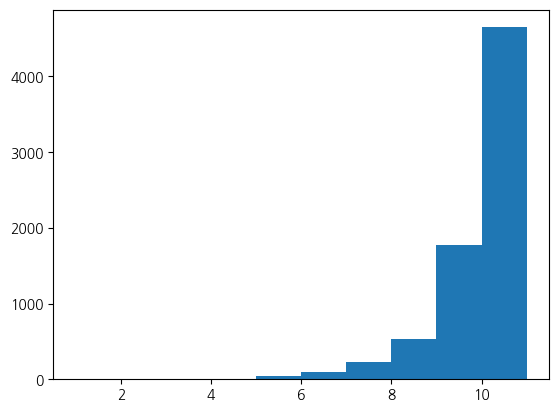

In [13]:
import matplotlib.pyplot as plt
plt.hist(data['안전점수'])

In [14]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(data['안전교육']))

In [15]:
threshold = 3
# 이상치 제거
data_out = data[(z_scores < threshold)]
data_out.shape

(7306, 17)

In [16]:
data_out

,유치원명,지역,급식유아수,영양교사및조리사수,소방대피훈련여부,가스점검여부,소방안전점검여부,전기설비점검여부,CCTV 설치여부,CCTV 총 설치수,안전교육,운행차량수,환경위생관리 점수,총유아수,사고수,나라,안전점수
0,가온유치원,강원도,120,3,1,1,1,1,1,20,52,2,5,120,2,대한민국,10
1,강동초등학교병설유치원,강원도,17,1,1,1,1,1,1,7,31,1,5,9,0,대한민국,10
2,강릉유치원,강원도,74,1,1,1,1,1,1,9,31,2,5,65,3,대한민국,10
3,강릉초등학교병설유치원,강원도,62,1,1,1,1,1,1,22,25,0,5,43,2,대한민국,10
4,경포대초등학교병설유치원,강원도,3,1,1,1,1,1,1,12,27,0,5,11,0,대한민국,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,충주해솔유치원,충청북도,133,3,1,1,1,1,1,4,51,2,5,134,0,대한민국,10
7339,칠금초등학교병설유치원,충청북도,59,1,1,1,1,1,1,31,21,0,5,13,0,대한민국,10
7340,탄금유치원,충청북도,118,3,1,1,1,1,1,11,30,1,5,115,4,대한민국,10
7341,한담유치원,충청북도,78,2,1,1,1,1,1,8,56,2,5,41,0,대한민국,10


In [17]:
data2=pd.read_excel("C:/Users/MYCOM/Downloads/방과후 과정 편성ㆍ운영에 관한 사항_20221.xlsx")
data3=pd.read_excel("C:/Users/MYCOM/Downloads/교실면적 현황_20221.xlsx")

In [18]:
merged_data1=pd.merge(data[['유치원명','총유아수','사고수']],
                     data2,on='유치원명',how='inner')

merged_data2=pd.merge(data[['유치원명','총유아수','사고수']],
                     data3,on='유치원명',how='inner')

In [19]:
merged_data1.columns

Index(['유치원명', '총유아수', '사고수', '교육청명', '교육지원청명', '설립유형', '주소', '운영시간',
       '독립편성학급수', '오후재편성학급수', '학급편성 계', '독립편성참여유아수', '오후재편성참여유아수', '참여유아수 계',
       '정규교원수', '기간제교원수', '강사수', '교직원수 계'],
      dtype='object')

In [20]:
merged_data2.columns

Index(['유치원명', '총유아수', '사고수', '교육청명', '교육지원청명', '설립유형', '주소', '교실수', '교실면적',
       '실내체육장', '보건/위생공간', '조리실/급식공간', '기타공간'],
      dtype='object')

In [21]:
merged_data3=pd.merge(merged_data1[['유치원명', '총유아수', '사고수', 
        '독립편성학급수', '오후재편성학급수', '학급편성 계',
        '독립편성참여유아수', '오후재편성참여유아수', '참여유아수 계',
       '정규교원수', '기간제교원수', '강사수', '교직원수 계']],
        merged_data2[['유치원명','교실수', '교실면적',
       '실내체육장', '보건/위생공간', '조리실/급식공간', '기타공간']],
        on='유치원명',how='inner')

In [22]:
merged_data3['N사고수']=0
merged_data3.loc[merged_data3['사고수']!=0,'N사고수']=1
merged_data3['N사고수'].value_counts()

1    797943
0    562531
Name: N사고수, dtype: int64

In [23]:
X=merged_data3.drop(['사고수','N사고수','유치원명','총유아수'],
                   axis=1,inplace=False)
y=merged_data3['N사고수']

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [25]:
X_scaled

array([[ 0.78254303, -0.83458998, -0.0277398 , ..., -0.41284955,
        -0.04880031, -0.0502574 ],
       [ 0.78254303, -0.83458998, -0.0277398 , ...,  1.22551037,
         0.00527596, -0.40795835],
       [ 0.78254303, -0.83458998, -0.0277398 , ...,  1.72043159,
         0.19724672,  1.55300934],
       ...,
       [-0.15604389, -0.83458998, -1.12319836, ...,  0.20153542,
         1.46533526, -0.465446  ],
       [-0.78176851,  1.75609205,  1.06771876, ...,  1.5839016 ,
         0.47573951,  2.33228641],
       [ 0.46968072, -0.83458998, -0.39289265, ..., -0.75417453,
        -0.05961557, -0.38560204]])

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 데이터 로드 (데이터는 X_train, y_train, X_test, y_test로 가정)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# GBM 모델 초기화
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2)

# 모델 학습
gbm.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
y_pred = gbm.predict(X_test)

# 정확도와 ROC AUC 스코어 출력
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

f1 score:  0.7403559166441512


In [27]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.5179459262497785


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5973739596170949

In [33]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류 문제 설정
    max_depth=5,  # 트리의 최대 깊이
    learning_rate=0.01,  # 학습률
    n_estimators=100  # 트리의 개수
)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
y_pred = xgb_model.predict(X_test)

# 정확도와 ROC AUC 스코어 출력
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)

Accuracy:  0.5962812053618463
ROC AUC:  0.515803944818728


In [34]:
f1_score(y_test,y_pred)

0.7406094399115922

In [56]:
import lightgbm as lgb
# LightGBM 모델 초기화
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'n_estimators':200,
    'metric': 'binary_logloss',
    'num_leaves': 40,
    'learning_rate': 0.005,
    'feature_fraction': 0.9
}

num_round = 200  # 반복 횟수 설정

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
# 모델 학습
lgb_model = lgb.train(params, train_data, num_round)

# 테스트 데이터로 모델 평가
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# 정확도와 ROC AUC 스코어 출력
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)


C:\Users\MYCOM\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 558753, number of negative: 393578
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.105956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2054
[LightGBM] [Info] Number of data points in the train set: 952331, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.586721 -> initscore=0.350428
[LightGBM] [Info] Start training from score 0.350428
Accuracy:  0.5961390983062309
ROC AUC:  0.5882857057194188


In [57]:
y_test

798379     1
1024438    0
1259579    1
1000816    0
65233      1
          ..
924122     1
257317     1
301911     1
798963     0
667427     1
Name: N사고수, Length: 408143, dtype: int64

In [58]:
y_pred

array([0.50128147, 0.58662413, 0.58324566, ..., 0.6135016 , 0.50734313,
       0.58377243])

In [59]:
f1_score(y_test, y_pred_binary)

0.7408298388529614

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)  # 선형 커널 사용

# 모델 학습
svm_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
y_pred = svm_model.predict(X_test)

# 정확도와 ROC AUC 스코어 출력
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)

In [ ]:
f1_score(y_test, y_pred)